# Erdos-Renyi Graphs

Code examples from [Think Complexity, 2nd edition](http://greenteapress.com/wp/complexity2), Chapter 2

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [221]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import networkx as nx
import numpy as np

# colors from our friends at http://colorbrewer2.org
COLORS = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462',
          '#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

In [222]:
from thinkstats2 import RandomSeed
RandomSeed(17)

## Directed graph

The first example is a directed graph that represents a social network with three nodes.

In [223]:
G = nx.DiGraph()
G.add_node('A1')
G.add_node('B1')
G.add_node('C1')
G.nodes()

['A1', 'C1', 'B1']

Here's how we add edges between nodes.

In [224]:
G.add_edge('A1', 'B1')
G.add_edge('A1', 'C1')
G.add_edge('B1', 'Bob')
G.edges()

[('A1', 'C1'), ('A1', 'B1'), ('B1', 'Bob')]

And here's how to draw the graph.

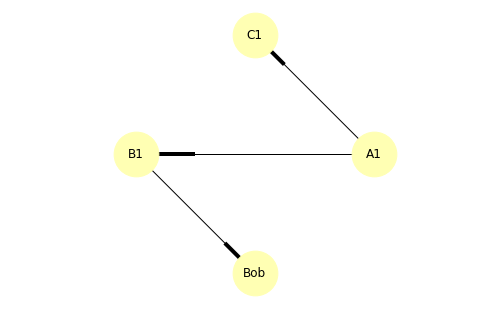

In [225]:
nx.draw_circular(G, 
                 node_color=COLORS[1], 
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')
plt.savefig('chap02-1.pdf')

**Exercise:**  Add another node and a few more edges and draw the graph again.

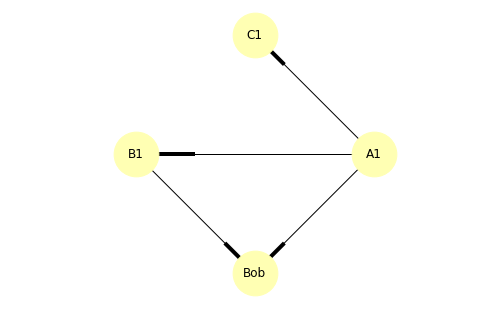

In [226]:
# Solution goes here
G.add_edge('A1','Bob')
nx.draw_circular(G, 
                 node_color=COLORS[1], 
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')
plt.savefig('chap02-1.pdf')

## Undirected graph

The second example is an undirected graph that represents cities and the driving times between them.

`pos` is a dictionary that maps from each city to its coordinates.

In [227]:
pos = dict(Albany=(-74, 43),
          Boston=(-71, 42),
          NYC=(-74, 41),
          Philly=(-75, 40))
pos['Albany']

(-74, 43)

We can use the keys in `pos` to add nodes to the graph.

In [228]:
G = nx.Graph()
G.add_nodes_from(pos)
G.nodes()

['NYC', 'Albany', 'Philly', 'Boston']

`drive_times` is a dictionary that maps from pairs of cities to the driving times between them.

In [229]:
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

We can use the keys from `drive_times` to add edges to the graph.

In [230]:
G.add_edges_from(drive_times)
G.edges()

[('NYC', 'Boston'), ('NYC', 'Philly'), ('NYC', 'Albany'), ('Albany', 'Boston')]

Now we can draw the graph using `pos` to indicate the positions of the nodes, and `drive_times` to label the edges.

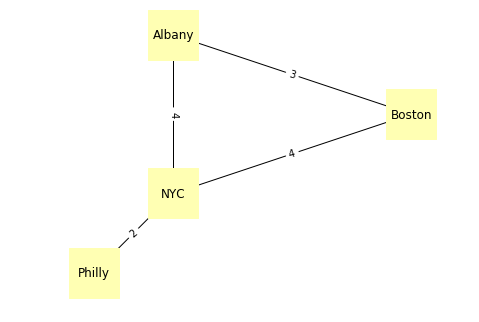

In [231]:
nx.draw(G, pos, 
        node_color=COLORS[1], 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels=drive_times)

plt.axis('equal')
plt.savefig('chap02-2.pdf')

**Exercise:**  Add another city and at least one edge.

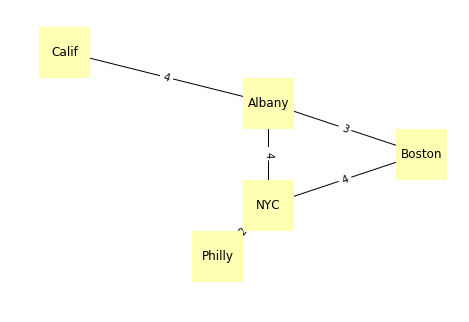

In [232]:
# Solution goes here
G.add_edge('Albany', 'Calif')
drive_times.update({('Albany', 'Calif'):4})
pos['Calif']=(-78, 44)
nx.draw(G, pos, 
        node_color=COLORS[1], 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels=drive_times)

plt.axis('equal')
plt.savefig('chap02-2myfig.pdf')

## Complete graph

To make a complete graph, we use a generator function that iterates through all pairs of nodes.

In [233]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

`make_complete_graph` makes a `Graph` with the given number of nodes and edges between all pairs of nodes.

In [234]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

Here's a complete graph with 10 nodes:

In [235]:
complete = make_complete_graph(10)
len(complete.nodes())

10

And here's what it looks like.

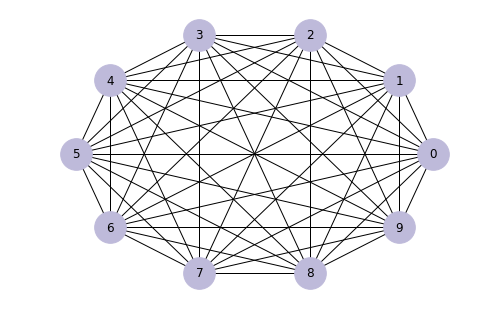

In [236]:
nx.draw_circular(complete, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-3.pdf')

The `neighbors` method returns a list of neighbors for a given node.

In [237]:
complete.neighbors(0)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

**Exercise:** Make and draw complete directed graph with 5 nodes.

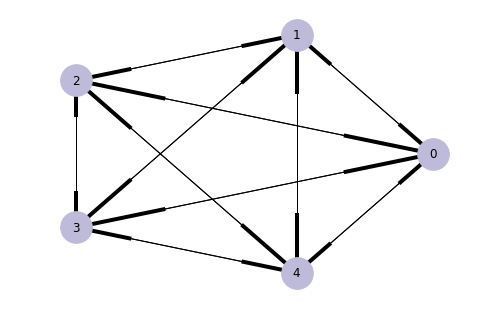

In [238]:
# Solution goes here
def all_pairsd(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i != j:
                yield (u, v)

def make_complete_dgraph(n):
    G = nx.DiGraph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairsd(nodes))
    return G 

dcomp = make_complete_dgraph(5)                          
dcomp.edges()

nx.draw_circular(dcomp, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02_dir_compHW.pdf')

## Random graphs

Next we'll make a random graph where the probability of an edge between each pair of nodes is $p$.

The helper function `flip` returns True with probability `p` and False with probability `1-p`

In [239]:
from numpy.random import random

def flip(p):
    return random() < p

`random_pairs` is a generator function that enumerates all possible pairs of nodes and yields each one with probability `p` 

In [240]:
def random_pairs(nodes, p):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i<j and flip(p):
                yield u, v

`make_random_graph` makes an ER graph where the probability of an edge between each pair of nodes is `p`.

In [241]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

Here's an example with `n=10` and `p=0.3`

In [242]:
random_graph = make_random_graph(10, 0.34)
r1 = random_graph
len(random_graph.edges())

17

And here's what it looks like:

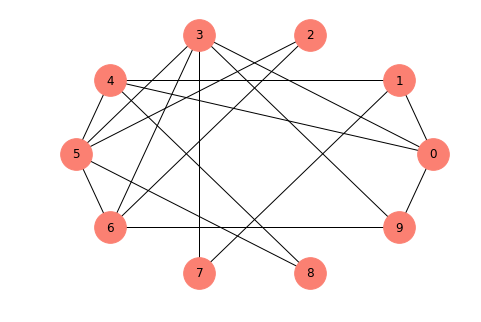

In [243]:
nx.draw_circular(random_graph, 
                 node_color=COLORS[3], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02-4.pdf')

## Connectivity

To check whether a graph is connected, we'll start by finding all nodes that can be reached, starting with a given node:

In [244]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In the complete graph, starting from node 0, we can reach all nodes:

In [245]:
reachable_nodes(complete, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In the random graph we generated, we can also reach all nodes (but that's not always true):

In [246]:
reachable_nodes(random_graph, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

We can use `reachable_nodes` to check whether a graph is connected:

In [247]:
def is_connected(G):
    start = next(G.nodes_iter())
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

Again, the complete graph is connected:

In [248]:
is_connected(complete)

True

But if we generate a random graph with a low value of `p`, it's not:

In [249]:
random_graph = make_random_graph(10, 0.1)
len(random_graph.edges())

6

In [250]:
is_connected(random_graph)

False

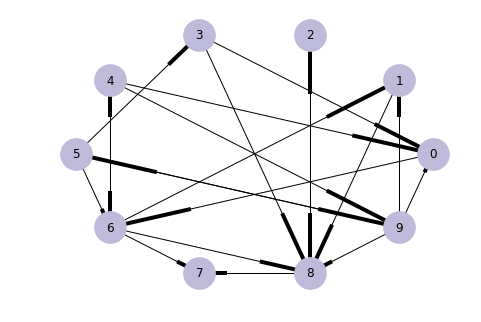

In [251]:
#  Creating random directed graph 
def random_pairsd(nodes, p):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i!=j and flip(p):
                yield (u, v)

def make_rand_dgraph(n,p):
    G = nx.DiGraph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairsd(nodes,p))
    return G 

rand_dG = make_rand_dgraph(10, .3)                          

nx.draw_circular(rand_dG, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)
plt.savefig('chap02_dir_rdGHW.pdf')

In [252]:
rand_dG.neighbors(2)

[8]

**Exercise:** What do you think it means for a directed graph to be connected?  Write a function that checks whether a directed graph is connected.

In [253]:
# Solution goes here
def is_compl_connected(G):
    n = len(G)
    nodes = range(n)
    res = True
    for i, u in enumerate(nodes):  
        res = (reachable_nodes(G, u) == len(G))
        if  res==False:
            break
    return res

is_compl_connected(rand_dG)

False

In [254]:
s1 = set([1, 2, 3])
s2= r1.neighbors(1)

unique = [x for x in r1.neighbors(1) if x not in s1]

unique


[0, 4, 7]

In [255]:
def reachable_nodes_precheck(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            unique = [x for x in G.neighbors(node) if x not in seen]
            stack.extend(unique)
    return seen


In [256]:
    reachable_nodes_precheck(r1, 3)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## Probability of connectivity

Now let's estimare the probability that a randomly-generated ER graph is connected.

This function takes `n` and `p`, generates `iters` graphs, and returns the fraction of them that are connected.

In [257]:
def prob_connected(n, p, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_random_graph(n, p)
        if is_connected(random_graph):
            count += 1
    return count/iters

With `n=10` and `p=0.3`, the probability of being connected is about 65%.

In [258]:
n = 10
prob_connected(n, 0.3, iters=10000)

0.6494

According to Erdos and Renyi, the critical value of `p` for `n=10` is about 0.23. 

In [259]:
pstar = np.log(n) / n
pstar

0.23025850929940458

So let's plot the probability of connectivity for a range of values for `p`

In [260]:
ps = np.logspace(-1.3, 0, 11)
ps

array([ 0.05011872,  0.0676083 ,  0.09120108,  0.12302688,  0.16595869,
        0.22387211,  0.30199517,  0.40738028,  0.54954087,  0.74131024,  1.        ])

In [261]:
ps[-2]

0.74131024130091738

I'll estimate the probabilities with `iters=1000`

In [262]:
ys = [prob_connected(n, p, 1000) for p in ps]

for p, y in zip(ps, ys):
    print(p, y)

0.0501187233627 0.0
0.0676082975392 0.0
0.0912010839356 0.004
0.123026877081 0.016
0.165958690744 0.111
0.223872113857 0.346
0.30199517204 0.664
0.407380277804 0.899
0.549540873858 0.989
0.741310241301 1.0
1.0 1.0


And then plot them, adding a vertical line at the computed critical value

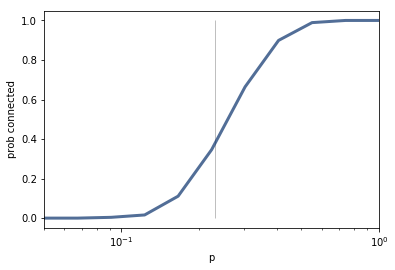

In [263]:
import thinkplot

thinkplot.vlines([pstar], 0, 1, color='gray')
thinkplot.plot(ps, ys)
thinkplot.config(xlabel='p', ylabel='prob connected', xscale='log', xlim=[ps[0], ps[-1]])
plt.savefig('chap02-5.pdf')

We can run the same analysis for a few more values of `n`.

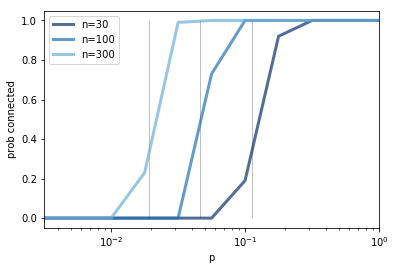

In [264]:
ns = [30, 100, 300]
ps = np.logspace(-2.5, 0, 11)

thinkplot.preplot(len(ns))
for n in ns:
    pstar = np.log(n) / n
    thinkplot.vlines([pstar], 0, 1, color='gray')

    ys = [prob_connected(n, p) for p in ps]
    thinkplot.plot(ps, ys, label='n=%d' % n)

thinkplot.config(xlabel='p', ylabel='prob connected',
                 xscale='log', xlim=[ps[0], ps[-1]],
                 loc='upper left')
plt.savefig('chap02-6.pdf')

As `n` increases, the critical value gets smaller and the transition gets more abrupt.

## Exercises

**Exercise:** In Chapter 2 we analyzed the performance of `reachable_nodes` and classified it in $O(n + m)$, where $n$ is the number of nodes and $m$ is the number of edges.  Continuing the
analysis, what is the order of growth for `is_connected`?

    def is_connected(G):
        start = next(G.nodes_iter())
        reachable = reachable_nodes(G, start)
        return len(reachable) == len(G)

In [265]:
# Solution goes here
# O(n+m)

**Exercise:** In my implementation of `reachable_nodes`, you might be bothered by the apparent inefficiency of adding *all* neighbors to the stack without checking whether they are already in `seen`.  Write a version of this function that checks the neighbors before adding them to the stack.  Does this "optimization" change the order of growth?  Does it make the function faster?

In [266]:
def reachable_nodes_precheck(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        # if node not in seen:
        seen.add(node)
        unique = [x for x in G.neighbors(node) if x not in seen]
        stack.extend(unique)
    return seen

reachable_nodes_precheck(r1, 3)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [267]:
# Solution goes here
import timeit
st1 = timeit.default_timer()
reachable_nodes_precheck(r1, 3)

ela1 = timeit.default_timer() - st1
ela1

0.00037190858529356774

In [268]:
st2 = timeit.default_timer()
reachable_nodes(r1, 3)
ela2 = timeit.default_timer() - st2

ela2

0.00022036791051505134

In [269]:
% timeit len(reachable_nodes(complete, 0))

The slowest run took 6.46 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 34.5 µs per loop


In [179]:
%timeit len(reachable_nodes_precheck(complete, 0))

10000 loops, best of 3: 72.2 µs per loop


**Exercise:** There are actually two kinds of ER graphs.  The one we generated in the chapter, $G(n, p)$, is characterized by two parameters, the number of nodes and the probability of an edge between nodes.

An alternative definition, denoted $G(n, m)$, is also characterized by two parameters: the number of nodes, $n$, and the number of edges, $m$.  Under this definition, the number of edges is fixed, but their location is random.

Repeat the experiments we did in this chapter using this alternative definition.  Here are a few suggestions for how to proceed:

1. Write a function called `m_pairs` that takes a list of nodes and the number of edges, $m$, and returns a random selection of $m$ edges.  A simple way to do that is to generate a list of all possible edges and use `random.sample`.

2. Write a function called `make_m_graph` that takes $n$ and $m$ and returns a random graph with $n$ nodes and $m$ edges.

3. Make a version of `prob_connected` that uses `make_m_graph` instead of `make_random_graph`.

4. Compute the probability of connectivity for a range of values of $m$.

How do the results of this experiment compare to the results using the first type of ER graph?

In [290]:
v1 = range(4)
myls = set()
import random
from random import sample
for i, u in enumerate(v1):
    for j, v in enumerate(v1):
        if i < j :
            myls.add((u, v))
u = random.sample(myls,3)   

u

[(2, 3), (0, 3), (0, 2)]

In [291]:
# Solution goes here
def m_pairs(nodes, nedge):
    myls = set()
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
#            if i!=j :
             if i<j :
                myls.add((u, v))
    u = random.sample(myls, nedge)
    return u
    
v1 = range(10)
val = m_pairs(v1,3)
val

[(7, 8), (3, 5), (6, 7)]

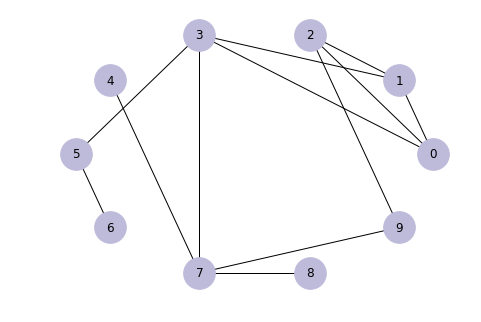

In [292]:
# Solution goes here
def make_m_graph(n,m):
    nodes = range(n)
    miedge = m_pairs(nodes,m)
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(miedge)
    return G 

new_mgraph = make_m_graph(10,12)

nx.draw_circular(new_mgraph, 
                 node_color=COLORS[2], 
                 node_size=1000, 
                 with_labels=True)

In [293]:
# Solution goes here
def prob_mcnctd(n, m, iters=100):
    count = 0
    for i in range(iters):
        randm_graph = make_m_graph(n, m)
        if is_connected(randm_graph):
            count += 1
    return count/iters

prob_mcnctd(12,12, iters=200)

0.155

In [309]:
n = 100
mstar = np.int(np.log(n)*(n-1))
lim = np.log10(n*(n-1)/2)
lim0 = np.log10(n)
mlst = np.logspace(lim0, lim, 10)
yms = [prob_mcnctd(n, np.int(m), 100) for m in mlst]

yms

[0.0, 0.0, 0.48, 0.94, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0]

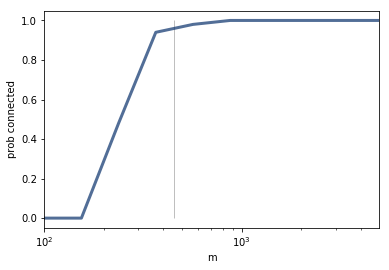

In [310]:
thinkplot.vlines([mstar], 0, 1, color='gray')
thinkplot.plot(mlst, yms)
thinkplot.config(xlabel='m', ylabel='prob connected', xscale='log', xlim=[mlst[0], mlst[-1]])
plt.savefig('chap02-last.pdf')
